### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



In [2]:
tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

Tienda 1: 1,150,880,400.00
Tienda 2: 1,116,343,500.00
Tienda 3: 1,098,019,600.00
Tienda 4: 1,038,375,700.00


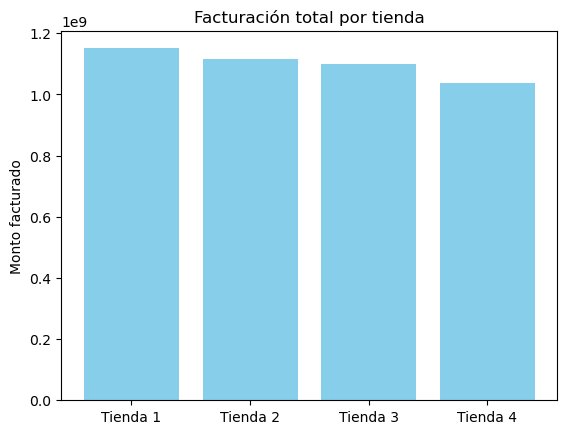

In [3]:
import matplotlib.pyplot as plt

facturacion_total = {}
for nombre, df in tiendas.items():
    df["facturacion"] = df["Precio"]  # Asumiendo que cada fila es una venta individual
    facturacion_total[nombre] = df["facturacion"].sum()
    print(f"{nombre}: {facturacion_total[nombre]:,.2f}")

plt.bar(facturacion_total.keys(), facturacion_total.values(), color="skyblue")
plt.title("Facturación total por tienda")
plt.ylabel("Monto facturado")
plt.show()

# 2. Ventas por categoría


Tienda 1
Categoría del Producto
Muebles         465
Electrónicos    448
Juguetes        324
Name: Precio, dtype: int64


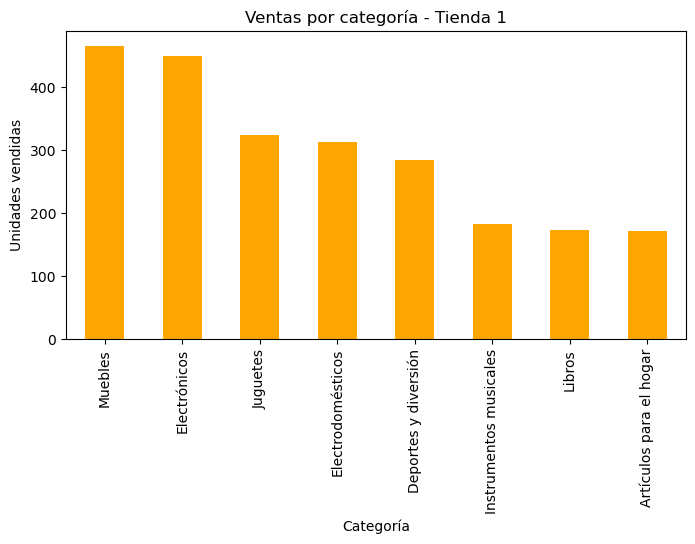


Tienda 2
Categoría del Producto
Muebles         442
Electrónicos    422
Juguetes        313
Name: Precio, dtype: int64


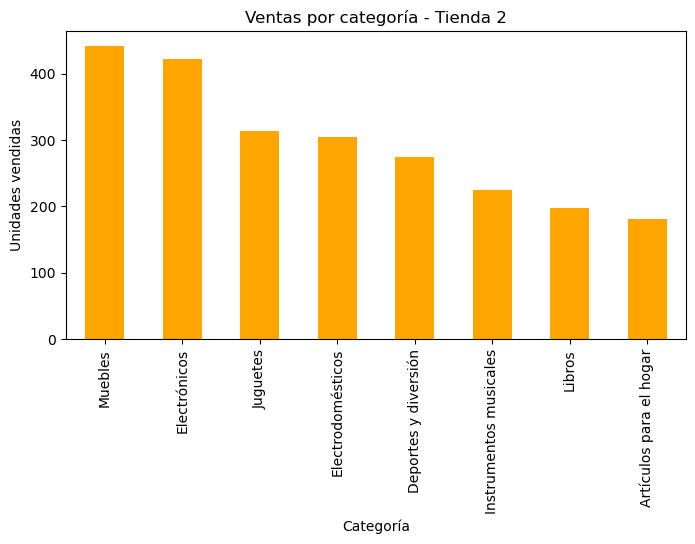


Tienda 3
Categoría del Producto
Muebles         499
Electrónicos    451
Juguetes        315
Name: Precio, dtype: int64


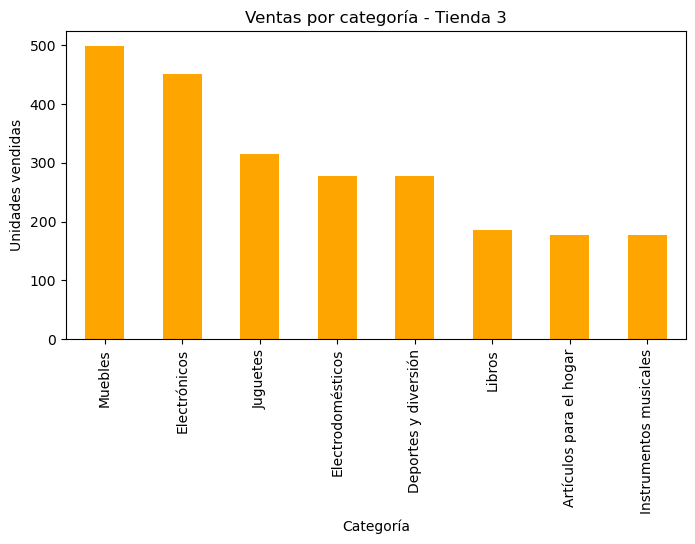


Tienda 4
Categoría del Producto
Muebles         480
Electrónicos    451
Juguetes        338
Name: Precio, dtype: int64


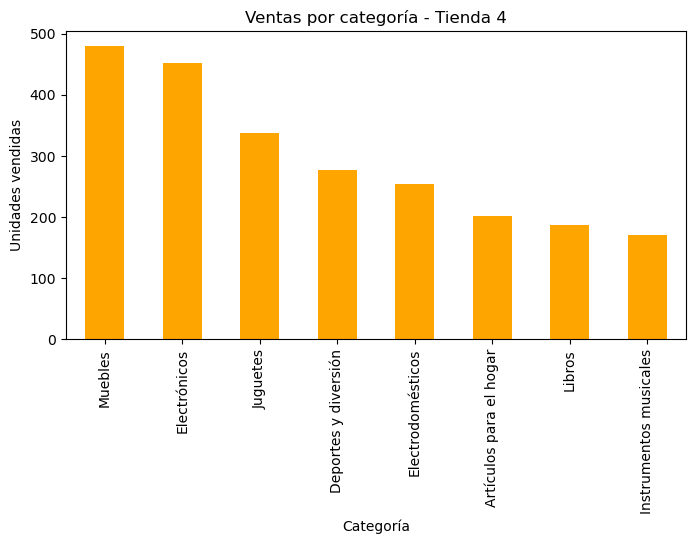

In [10]:
for nombre, df in tiendas.items():
    categorias = df.groupby("Categoría del Producto")["Precio"].count().sort_values(ascending=False)
    print(f"\n{nombre}")
    print(categorias.head(3))
    
    # Gráfico de barras de categorías
    categorias.plot(kind="bar", figsize=(8,4), color="orange")
    plt.title(f"Ventas por categoría - {nombre}")
    plt.xlabel("Categoría")
    plt.ylabel("Unidades vendidas")
    plt.show()

# 3. Calificación promedio de la tienda


In [13]:
for nombre, df in tiendas.items():
    print(f"{nombre}: {df['Calificación'].mean():.2f}")

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [19]:
for nombre, df in tiendas.items():
    productos = df.groupby("Producto")["Producto"].count().sort_values()
    menos_vendido = productos.head(5)   # 5 menos vendidos
    mas_vendido = productos.tail(5)     # 5 más vendidos

    print(f"\n{nombre}")
    print("Menos vendidos:\n", menos_vendido)
    print("Más vendidos:\n", mas_vendido)



Tienda 1
Menos vendidos:
 Producto
Celular ABXY                   33
Auriculares con micrófono      33
Olla de presión                35
Pandereta                      36
Ciencia de datos con Python    39
Name: Producto, dtype: int64
Más vendidos:
 Producto
Bloques de construcción    56
Secadora de ropa           58
Armario                    60
TV LED UHD 4K              60
Microondas                 60
Name: Producto, dtype: int64

Tienda 2
Menos vendidos:
 Producto
Juego de mesa      32
Mesa de comedor    34
Impresora          34
Sillón             35
Auriculares        37
Name: Producto, dtype: int64
Más vendidos:
 Producto
Pandereta                    58
Guitarra acústica            58
Batería                      61
Microondas                   62
Iniciando en programación    65
Name: Producto, dtype: int64

Tienda 3
Menos vendidos:
 Producto
Bloques de construcción    35
Microondas                 36
Mochila                    36
Set de vasos               36
Vaso térmico      

# 5. Envío promedio por tienda

Tienda 1: 26018.61
Tienda 2: 25216.24
Tienda 3: 24805.68
Tienda 4: 23459.46


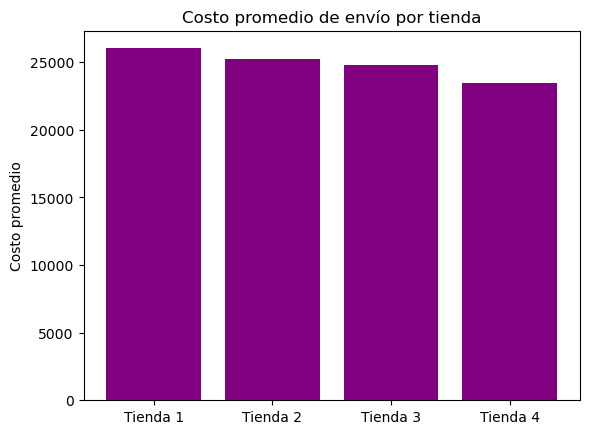

In [20]:
envios = {}
for nombre, df in tiendas.items():
    envios[nombre] = df["Costo de envío"].mean()
    print(f"{nombre}: {envios[nombre]:.2f}")

plt.bar(envios.keys(), envios.values(), color="purple")
plt.title("Costo promedio de envío por tienda")
plt.ylabel("Costo promedio")
plt.show()